In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import crocoddyl
import random
crocoddyl.switchToNumpyArray()

In [3]:
def data(nTraj:int = 1000,
         maxiter = 1000,
         precision = 1e-9,
         isFeasible:bool = False,
         regInit=.1,
         thetaVal:bool = False,
         fddp:bool = False
        ):
    """
    The dafault args that solver takes are  
    : init_xs=[]
    : init_us=[]
    : maxiter=1000
    : isFeasible=False
    : regInit=None. Initial guess for the regularization value. Very low values are typical
                   used with very good guess points (init_xs, init_us).\n
    
    """
    
    model = crocoddyl.ActionModelUnicycle()
    x_data = []
    y_data = []
    
    for _ in range(nTraj):

        if thetaVal:
            initial_config = [random.uniform(-1.99, 1.99), random.uniform(-1.99, 1.99), random.uniform(0.,1.)]
        else:
            initial_config = [random.uniform(-1.99, 1.99), random.uniform(-1.99, 1.99), 0.0]
        model.costWeights = np.matrix([1, 0.3]).T
        problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 30, model)
        if fddp:
            ddp = crocoddyl.SolverFDDP(problem)
        else:
            ddp = crocoddyl.SolverDDP(problem)
            
        ddp.th_stop = precision    
        ddp.solve([], [], maxiter, isFeasible)
        if ddp.iter < 1000:
            xs = np.array(ddp.xs)
            us = np.array(ddp.us)
            i = []
            for d in ddp.datas():
                i.append(d.cost)
            for index, value in enumerate(i):
                i[index] = sum(i[index:])
                
            i = np.array(i).reshape(31, 1)    
            xs = np.hstack((xs[1:,:],us, i[1:,:]))  
        y_data.append(xs.ravel())   
        x_data.append(initial_config)
        
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    del model, ddp
    return x_data, y_data

In [11]:
x, y = data(10000)


In [12]:
y.shape

(10000, 180)

X_Train :  (10000, 3)  and Y_Train:  (10000, 180)
Train on 9000 samples, validate on 1000 samples
Epoch 1/150
9000/9000 [==============================] - 0s 41us/step - loss: 3.0728 - mse: 1.2185 - rmse: 0.9978 - max_error: 14.7472 - mae: 0.4061 - val_loss: 1.9313 - val_mse: 1.2353 - val_rmse: 1.0060 - val_max_error: 14.8394 - val_mae: 0.4056
Epoch 2/150
9000/9000 [==============================] - ETA: 0s - loss: 1.7531 - mse: 1.1935 - rmse: 0.9863 - max_error: 14.5775 - mae: 0.393 - 0s 22us/step - loss: 1.7248 - mse: 1.1851 - rmse: 0.9825 - max_error: 14.5634 - mae: 0.3918 - val_loss: 1.6318 - val_mse: 1.2020 - val_rmse: 0.9912 - val_max_error: 14.7005 - val_mae: 0.3960
Epoch 3/150
9000/9000 [==============================] - 0s 21us/step - loss: 1.5184 - mse: 1.1548 - rmse: 0.9691 - max_error: 14.4865 - mae: 0.3844 - val_loss: 1.4816 - val_mse: 1.1725 - val_rmse: 0.9783 - val_max_error: 14.5636 - val_mae: 0.3897
Epoch 4/150
9000/9000 [==============================] - 0s 23us/step 

9000/9000 [==============================] - 0s 22us/step - loss: 0.7176 - mse: 0.7134 - rmse: 0.8143 - max_error: 8.1271 - mae: 0.3381 - val_loss: 0.7275 - val_mse: 0.7230 - val_rmse: 0.8194 - val_max_error: 8.2793 - val_mae: 0.3436
Epoch 67/150
9000/9000 [==============================] - 0s 22us/step - loss: 0.7174 - mse: 0.7133 - rmse: 0.8144 - max_error: 8.0803 - mae: 0.3381 - val_loss: 0.7274 - val_mse: 0.7228 - val_rmse: 0.8196 - val_max_error: 8.2459 - val_mae: 0.3436
Epoch 68/150
9000/9000 [==============================] - 0s 22us/step - loss: 0.7173 - mse: 0.7133 - rmse: 0.8146 - max_error: 8.0794 - mae: 0.3381 - val_loss: 0.7269 - val_mse: 0.7227 - val_rmse: 0.8197 - val_max_error: 8.2167 - val_mae: 0.3436
Epoch 69/150
9000/9000 [==============================] - 0s 21us/step - loss: 0.7175 - mse: 0.7132 - rmse: 0.8146 - max_error: 8.0432 - mae: 0.3381 - val_loss: 0.7282 - val_mse: 0.7226 - val_rmse: 0.8198 - val_max_error: 8.1910 - val_mae: 0.3435
Epoch 70/150
9000/9000 [=

9000/9000 [==============================] - 0s 21us/step - loss: 0.7175 - mse: 0.7131 - rmse: 0.8157 - max_error: 7.8983 - mae: 0.3381 - val_loss: 0.7266 - val_mse: 0.7223 - val_rmse: 0.8206 - val_max_error: 8.0354 - val_mae: 0.3436
Epoch 133/150
9000/9000 [==============================] - 0s 20us/step - loss: 0.7173 - mse: 0.7131 - rmse: 0.8156 - max_error: 7.8689 - mae: 0.3381 - val_loss: 0.7270 - val_mse: 0.7223 - val_rmse: 0.8206 - val_max_error: 8.0350 - val_mae: 0.3436
Epoch 134/150
9000/9000 [==============================] - 0s 22us/step - loss: 0.7177 - mse: 0.7131 - rmse: 0.8157 - max_error: 7.8759 - mae: 0.3381 - val_loss: 0.7269 - val_mse: 0.7223 - val_rmse: 0.8206 - val_max_error: 8.0393 - val_mae: 0.3436
Epoch 135/150
9000/9000 [==============================] - 0s 22us/step - loss: 0.7173 - mse: 0.7131 - rmse: 0.8157 - max_error: 7.8627 - mae: 0.3381 - val_loss: 0.7271 - val_mse: 0.7223 - val_rmse: 0.8206 - val_max_error: 8.0353 - val_mae: 0.3436
Epoch 136/150
9000/900

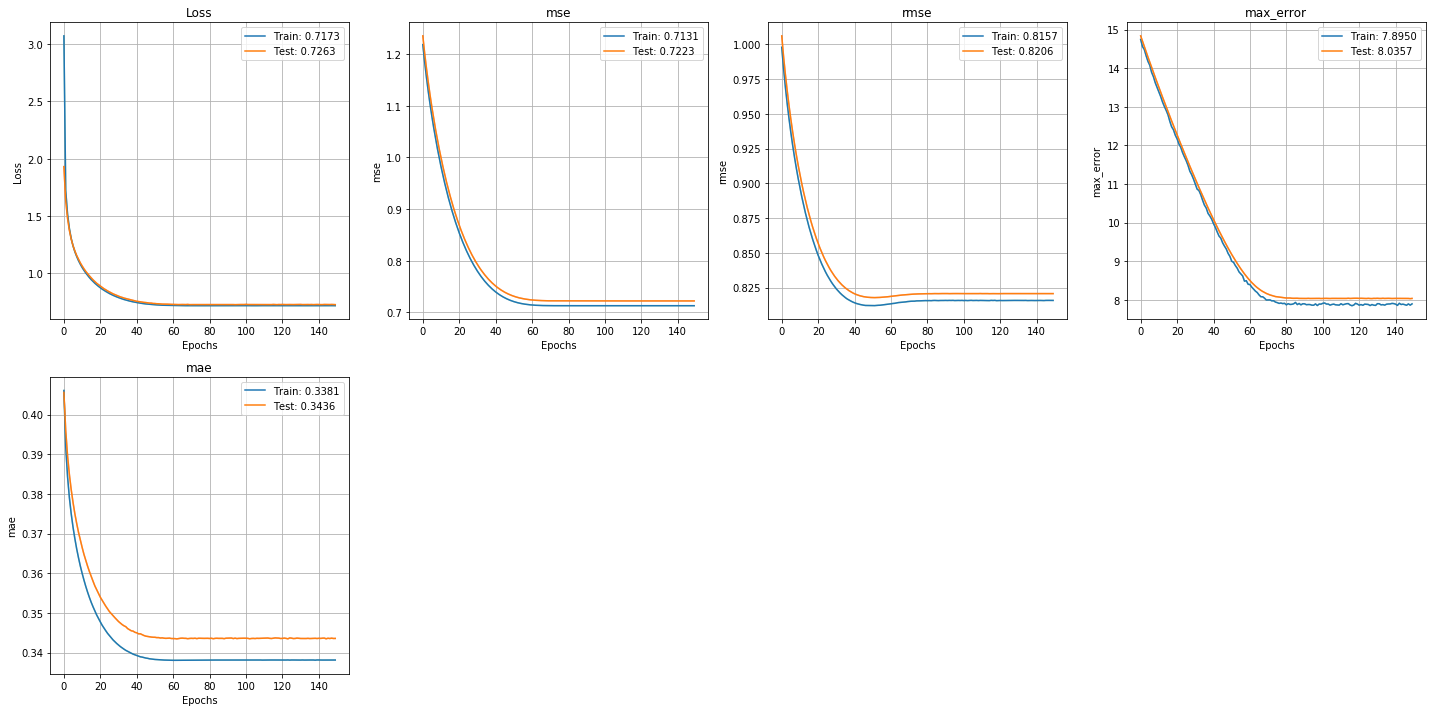

In [21]:
"""
This will define a neural net
"""
from keras import backend as K 
K.clear_session()
from keras import regularizers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import matplotlib.pyplot as plt
from plot_keras_history import plot_history
from extra_keras_utils import is_gpu_available
from keras.utils import plot_model



def rmse(y_true, y_pred):
	return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def max_error(y_true, y_pred):
    """
    Best score = 0
    """
    return K.max(K.abs(y_true - y_pred))

def loss(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true) - K.square(y_true - noise), axis=-1)


def kerasNet(x_data,
             y_data,
             NUNITS_INPUT = 32,
             NUNITS = 32,
             NHIDDEN = 2,
             lr = 1e-4,
             EPOCHS = 150,
             BATCHSIZE = 64,
             validation_split = 0.1,
             VERBOSE = 1,
             optimizer:str = "adam",
             loss = ['max_error'],
             plot_results:bool = True,
             baseline:bool = False                     
            ):
    """
    2 hidden layers, sigmoid tanh
    
    """

    model = Sequential()
    model.name = "Baseline"
    model.add(Dense(NUNITS_INPUT, input_dim=(x_data.shape[1]), activation = "relu", name="First"))
    for _ in range(NHIDDEN):
        
        model.add(Dense(NUNITS,
                      activation = "tanh"                           
                    ))           
        model.add(Dense(NUNITS,
                        activation = "tanh",
                        kernel_initializer = 'glorot_uniform',
                        bias_initializer = 'random_normal',
                        kernel_regularizer=regularizers.l2(0.01),
                        activity_regularizer=regularizers.l1(0.01)    
                        )) 
            

    model.add(Dense(y_data.shape[1],                    
                   activation = 'linear',
                   name = "Final"))

    model.compile(loss= 'mse',
                  optimizer=optimizer,
                  metrics = ['mse',rmse, max_error, 'mae']
                  )
        

    
    print("X_Train : ", x_data.shape," and Y_Train: ", y_data.shape)
    history = model.fit(x_data, 
                        y_data,
                        validation_split = validation_split,
                        epochs = EPOCHS,
                        batch_size= BATCHSIZE,
                        verbose = VERBOSE
                        ).history
    
    print(model.summary())
    plot_history(history)

    return model
net = kerasNet(x, y)


[[ 3 11]]


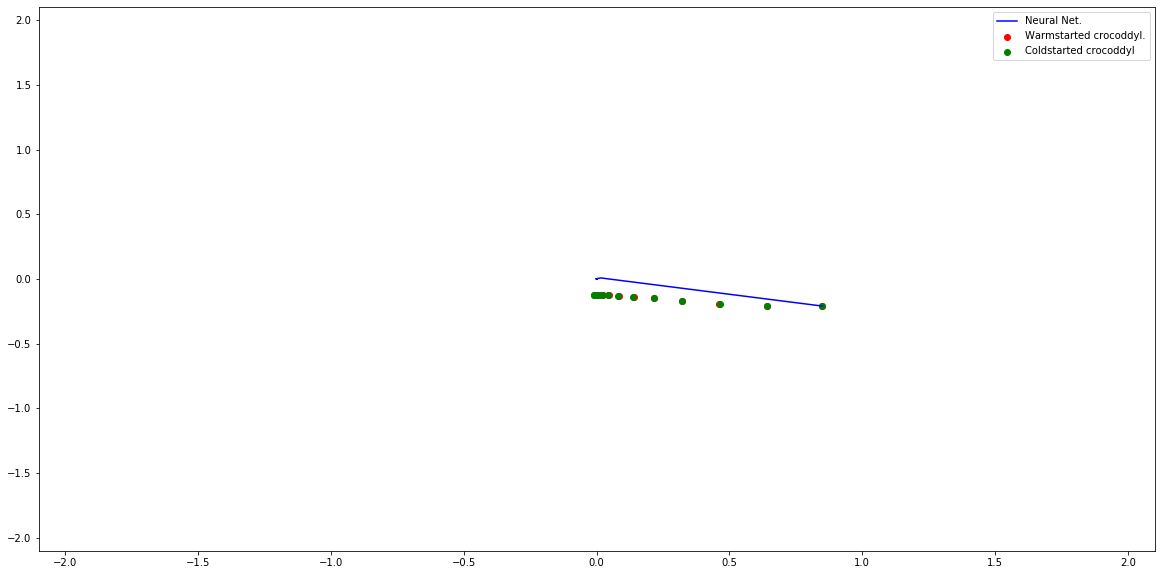

[[18 59]]


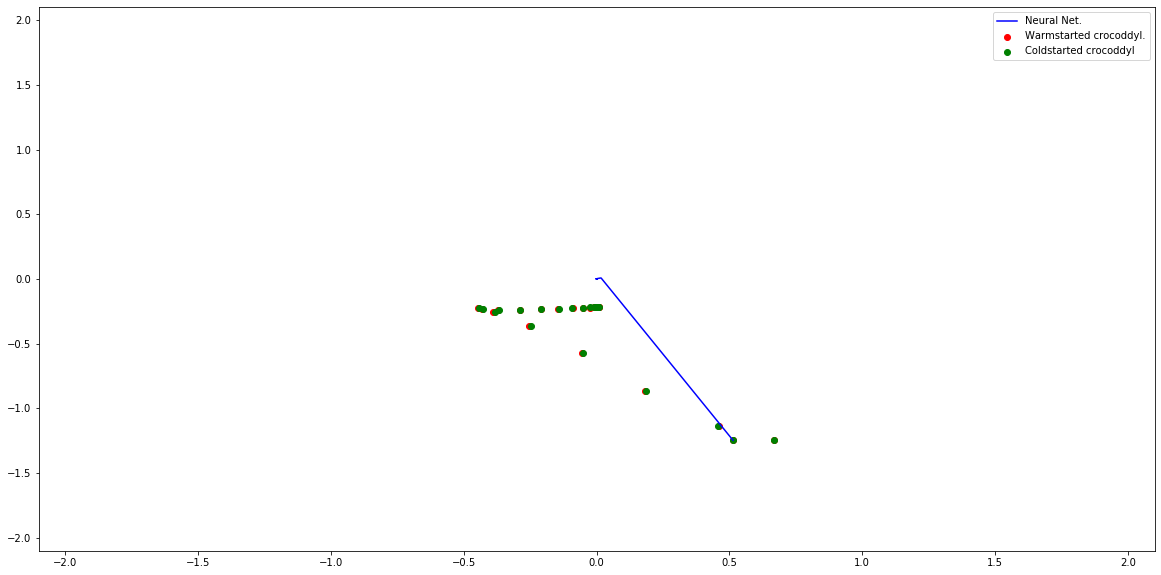

[[11 34]]


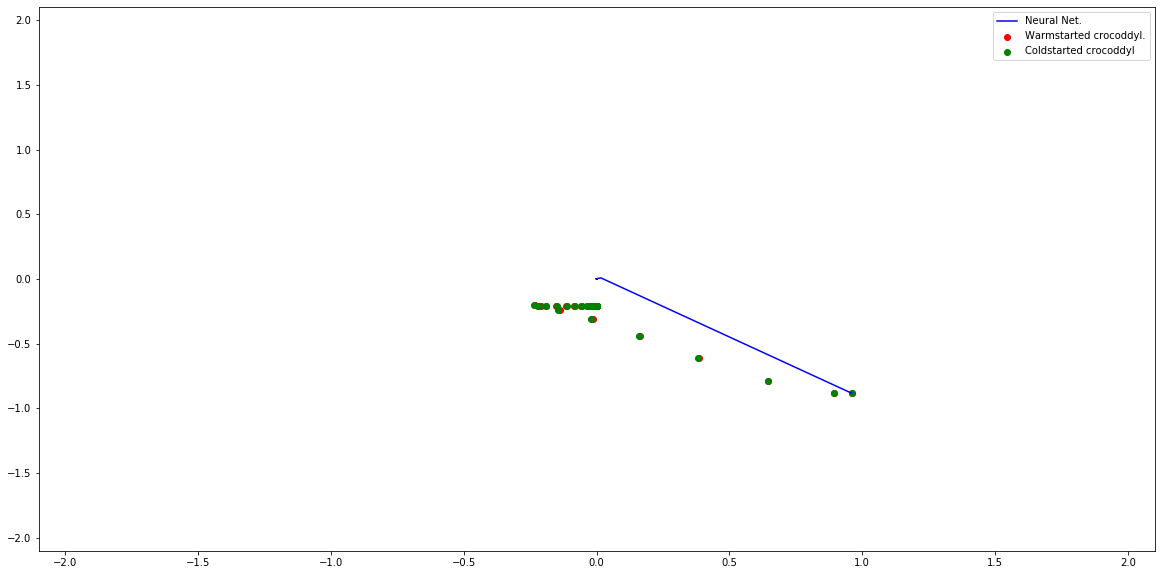

[[14 33]]


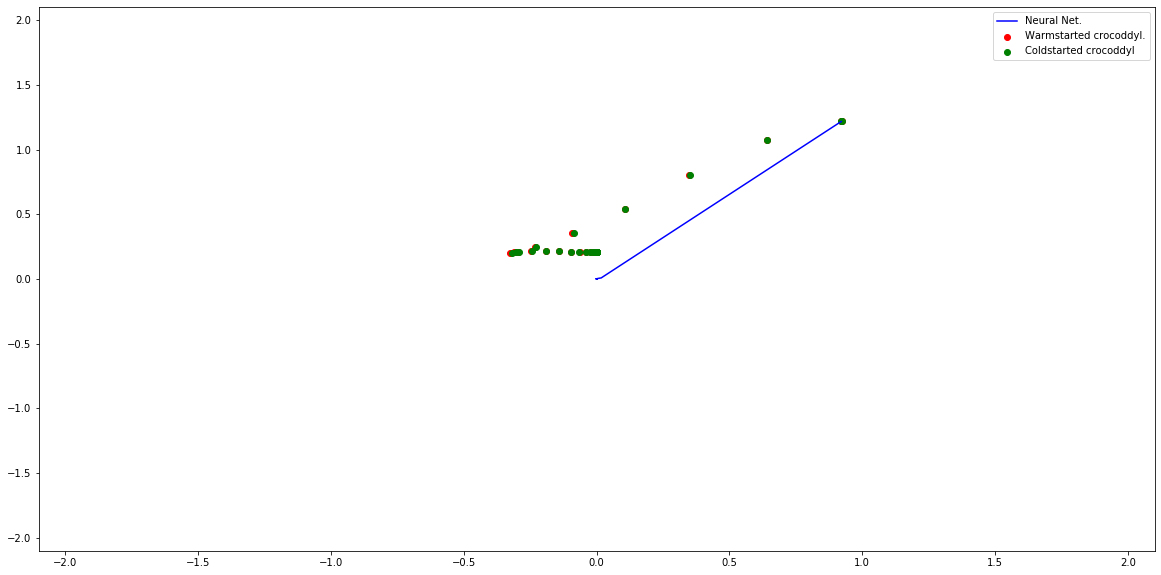

[[ 3 10]]


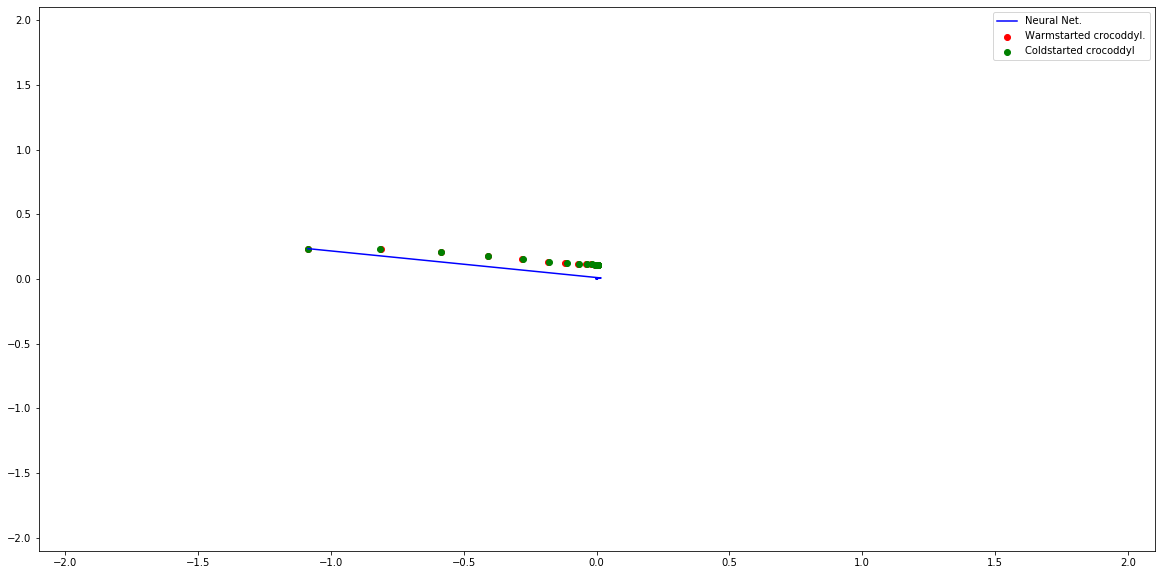

[[ 4 10]]


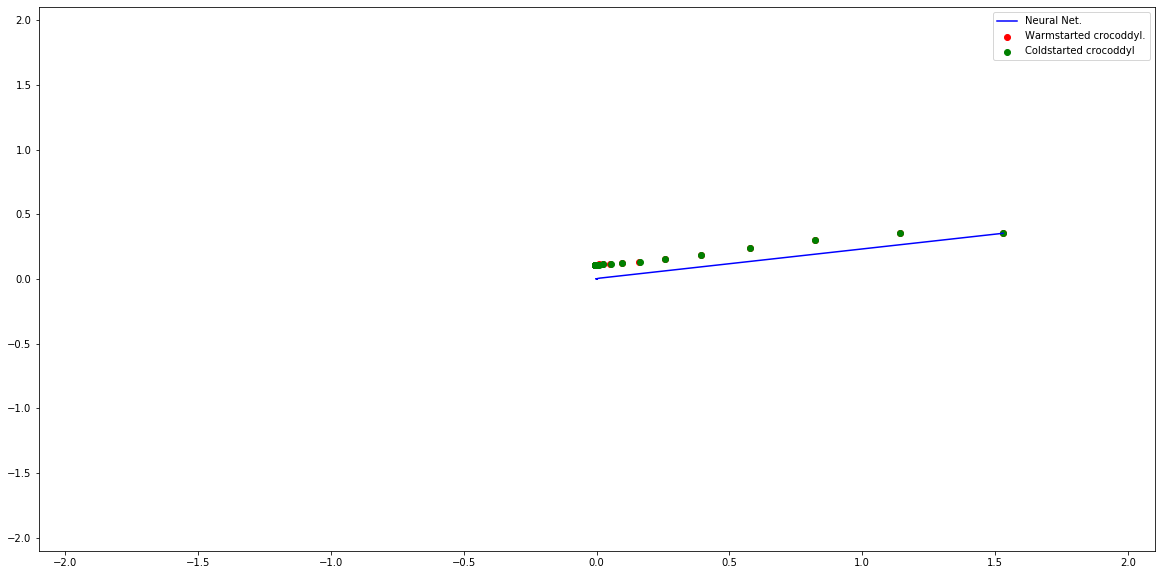

[[16 38]]


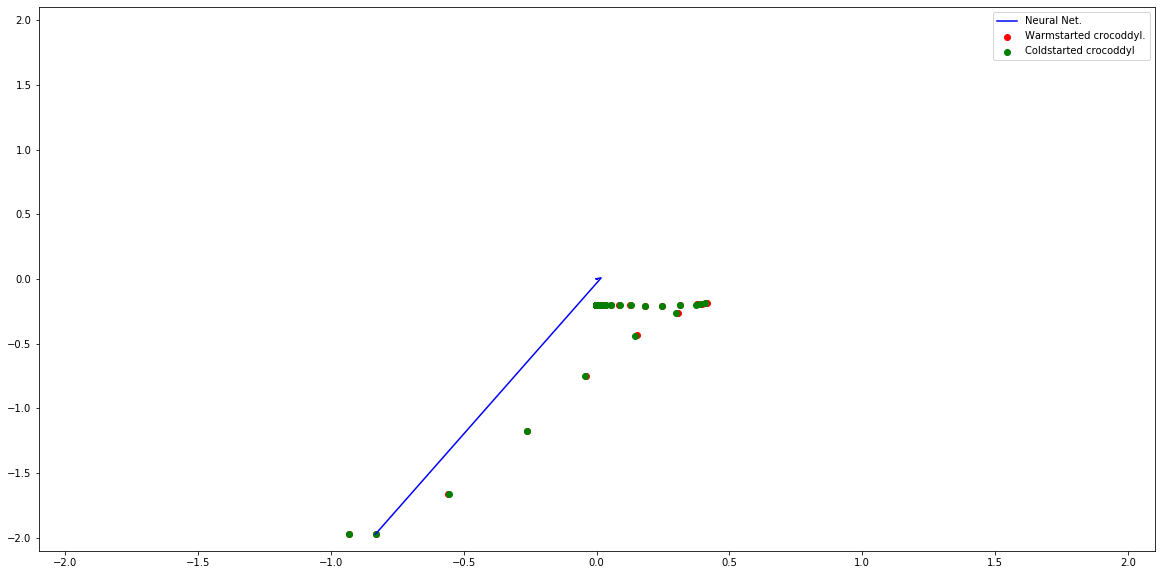

[[ 8 61]]


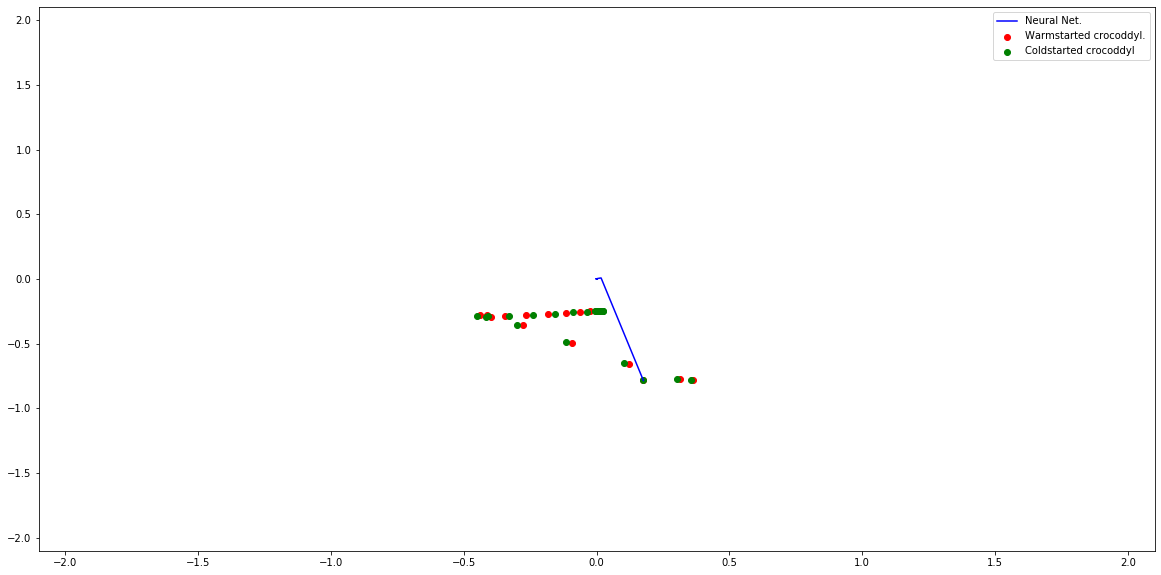

[[3 8]]


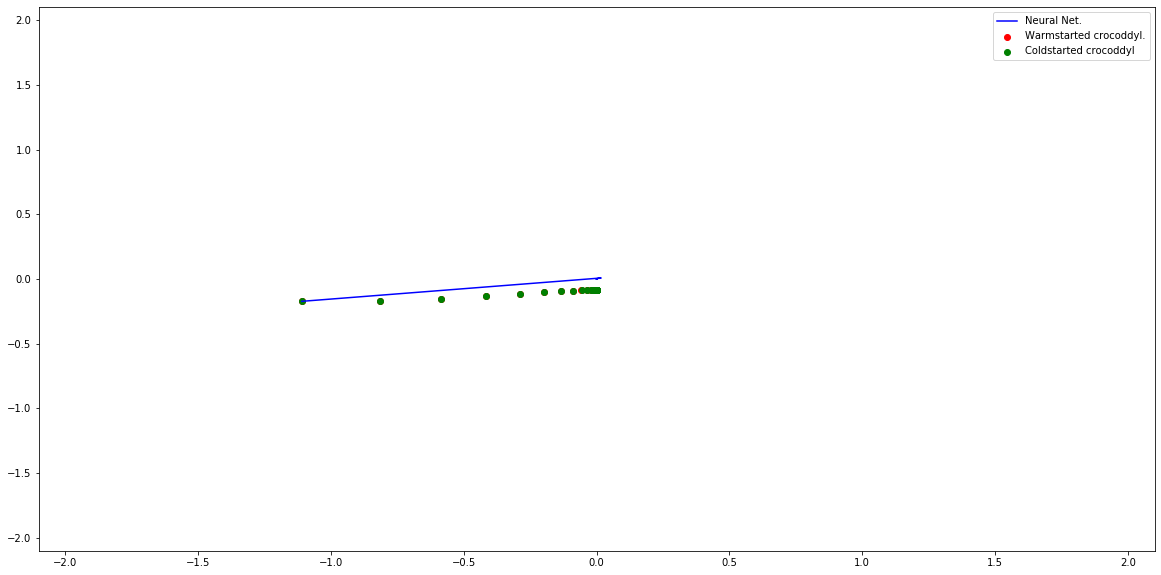

[[ 8 23]]


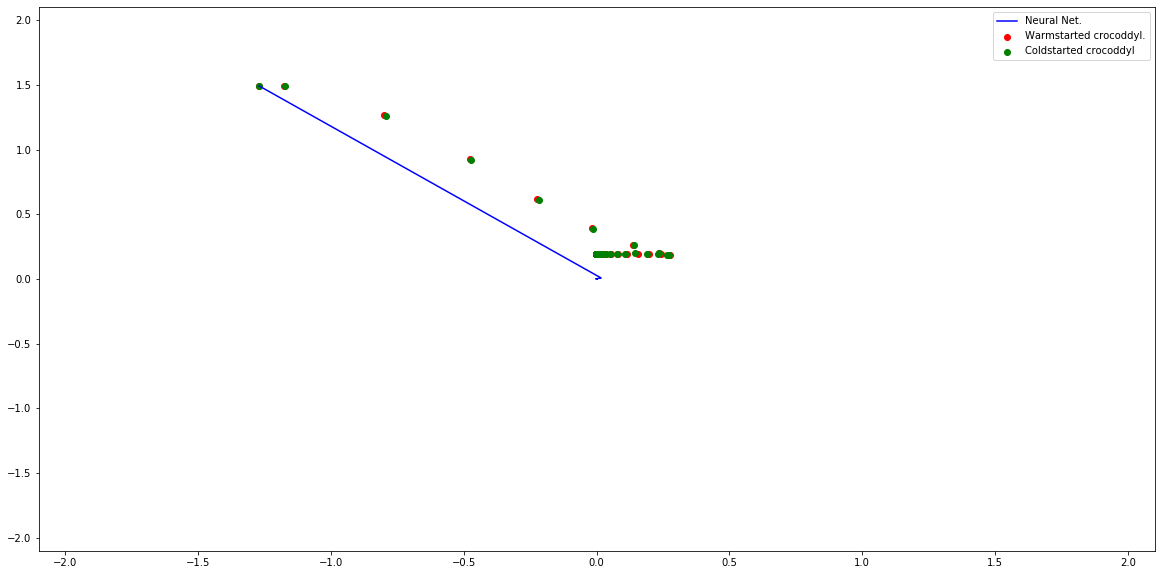

In [24]:
for _ in range(10):
    starting_state =  [random.uniform(-1.99, 1.99), random.uniform(-1.99, 1.99), 0.0]
    x_test = np.array(starting_state).reshape(1, -1)
    y_pred = net.predict(x_test)
    result = y_pred.reshape(30, 6)


    init_xs = []
    init_us =[]
    init_xs.append(np.array(starting_state))
    for row in result:
        init_xs.append(row[0:3])
        init_us.append(row[3:5])




    # For comparision, both models are given the same problem. The only difference is in ddp.solve.
    iterations = []
    #...... WARMSTARTING CROCODDYL
    model = crocoddyl.ActionModelUnicycle()
    model.costWeights = np.matrix([1, 0.3]).T
    problem = crocoddyl.ShootingProblem(np.matrix(starting_state).T, [ model ] * 30, model)
    ddp = crocoddyl.SolverDDP(problem)
    ddp.th_stop = 1e-3

    maxiter = 1000
    regInit = 0.01
    ddp.solve(init_xs, init_us, maxiter, False, regInit) 
        #plt.scatter(starting_state[0], starting_state[1])


    #..... COLDSTARTING CROCODDYL    
    model2 = crocoddyl.ActionModelUnicycle()
    model2.costWeights = np.matrix([1, 0.3]).T
    problem2 = crocoddyl.ShootingProblem(np.matrix(starting_state).T, [ model2 ] * 30, model2)
    ddp2 = crocoddyl.SolverDDP(problem2)
    ddp2.th_stop = 1e-9
    ddp2.solve([], [], 1000)


    #.. Storing the number of iterations it took when warmstarting and coldstarting
    iterations.append(np.array([ddp.iter, ddp2.iter]))

    iterations = np.array(iterations)

    print(iterations)


    ddp_xs = np.array(ddp.xs)
    ddp2_xs = np.array(ddp2.xs)

    import matplotlib.pyplot as plt
    import seaborn
    %matplotlib inline
    xs = np.array(init_xs)
    fig=plt.figure(figsize=(20,10))
    ax=fig.add_subplot(111)
    ax.set_xlim(xmin=-2.1, xmax=2.1)
    ax.set_ylim(ymin=-2.1, ymax=2.1)
    ax.plot(xs[:,0], xs[:,1], c = 'blue', label = 'Neural Net.')
    ax.scatter(ddp_xs[:,0], ddp_xs[:,1], c = 'red', label = 'Warmstarted crocoddyl.')
    ax.scatter(ddp2_xs[:,0], ddp2_xs[:,1], c = 'green', label = 'Coldstarted crocoddyl')
    plt.legend()
    plt.show()

In [ ]:
import multiprocessing as mp

def _try_multiprocess(args_list, num_cpu, max_process_time, max_timeouts):
    # Base case
    if max_timeouts == 0:
        return None

    if num_cpu == 1:
        results = [generate_paths_star(args_list[0])]  # dont invoke multiprocessing unnecessarily

    else:
        pool = mp.Pool(processes=num_cpu, maxtasksperchild=1)
        parallel_runs = [pool.apply_async(generate_paths_star,
                                         args=(args_list[i],)) for i in range(num_cpu)]
        try:
            results = [p.get(timeout=max_process_time) for p in parallel_runs]
        except Exception as e:
            print(str(e))
            print("Timeout Error raised... Trying again")
            pool.close()
            pool.terminate()
            pool.join()
            return _try_multiprocess(args_list, num_cpu, max_process_time, max_timeouts - 1)

        pool.close()
        pool.terminate()
        pool.join()

    return results

In [25]:
import crocoddyl
import numpy as np
import random
crocoddyl.switchToNumpyArray()

starting_state =  [random.uniform(-1.99, 1.99), random.uniform(-1.99, 1.99), 0.0]
model = crocoddyl.ActionModelUnicycle()
model.costWeights = np.matrix([1, 0.3]).T
problem = crocoddyl.ShootingProblem(np.matrix(starting_state).T, [ model ] * 30, model)
ddp = crocoddyl.SolverDDP(problem)
ddp.th_stop = 1e-3

maxiter = 1000
regInit = 0.01
ddp.solve(init_xs, init_us, maxiter, False, regInit) 

True

In [28]:
ddp.th_acceptStep


0.1